## Task in general :

The goal is to develop a model to estimate the bike demand in future given the parameters as observed in the past.


### it includes
- cleaning data
- Adding derived features
- Analyzing the dataset

In [ ]:

import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import Ridge

import seaborn as sns


In [ ]:
import pandas as pd
bikes = pd.read_csv("hour.csv")
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


# Needed functions ➰


In [ ]:
def day(bikes):
    days = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']
    bikes['day'] = bikes['weekday'].apply(lambda x: days[x])
    return bikes

def season(bikes):
  season = ['winter', 'spring', 'summer', 'autumn']
  bikes['sesn'] = bikes['season'].apply(lambda x : season[int(x)-1])
  return bikes

def Weekend(bikes):
  weekends=['saturday', 'sunday']
  bikes['weekend'] = bikes['day'].isin(weekends).astype(int)
  return bikes


def MonthCount(bikes):
  bikes['dteday'] = pd.to_datetime(bikes['dteday'])
  bikes['m-y'] = bikes['dteday'].dt.strftime('%Y-%m')
  l = bikes['m-y'].nunique()
  bikes.drop(['m-y'], axis=1)
  return l





# Cleaning data and exploring the data set✅

In [ ]:
import pandas as pd

bikes = bikes.drop(['yr', 'instant', 'atemp', 'casual', 'registered'], axis=1, errors= 'ignore')
bikes.isna().sum().sum()

if 'friday' not in bikes['weekday']:
  bikes = day(bikes)

if 'sesn' not in bikes.columns :
  bikes = season(bikes)

if 'weekend' not in bikes.columns:
  bikes = Weekend(bikes)

if 'dayCount' not in bikes.columns :
  bikes['dayCount'] = pd.Series(range(0,bikes.shape[0]))


In [ ]:
bikes.info()
print(f"the whole study took : {MonthCount(bikes)} months and {len(bikes['day'])} days as total")
bikes.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
 12  day         17379 non-null  object 
 13  sesn        17379 non-null  object 
 14  weekend     17379 non-null  int64  
 15  dayCount    17379 non-null  int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 2.1+ MB
the whole study took : 24 months and 17379 days as total


,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day,sesn,weekend,dayCount,m-y
14435,2012-08-29,3,8,16,0,3,1,1,0.76,0.37,0.1343,493,wednesday,summer,0,14435,2012-08
14938,2012-09-19,3,9,15,0,3,1,1,0.62,0.35,0.0000,311,wednesday,summer,0,14938,2012-09
175,2011-01-08,1,1,14,0,6,0,1,0.20,0.32,0.4925,95,saturday,winter,1,175,2011-01
4947,2011-07-30,3,7,1,0,6,0,1,0.76,0.55,0.0896,90,saturday,summer,1,4947,2011-07
1747,2011-03-18,1,3,12,0,5,1,2,0.56,0.49,0.3582,195,friday,winter,0,1747,2011-03


# **MODEL TRAINING**
**predict :**count , casual or registed
**features :**


In [ ]:
cutoff = "2012-06-30"
train = bikes[bikes['dteday'] < cutoff].copy()
test = bikes[bikes['dteday'] >= cutoff].copy()
exclude =['cnt', 'dteday', 'day', 'sesn', 'm-y']

min_train = train['dteday'].min().date()
max_train = train['dteday'].max().date()
min_test = test['dteday'].min().date()
max_test = test['dteday'].max().date()
print(f"for train : [{min_train} ** {max_train}] , length: {len(Y_train)}")
print(f"for test : [{min_test} ** {max_test} ] , length: {len(Y_test)}")


X_train = train.drop(exclude, axis=1).values
Y_train = train['cnt'].values

X_test = test.drop(exclude, axis=1).values
Y_test = test['cnt'].values

M = linear_model.LinearRegression()
M = Ridge(alpha=5)
M.fit(X_train, Y_train)

train['trend'] = M.predict(X_train)
train['Detrend'] = train['cnt'] - train['trend']

test['trend'] = M.predict(X_test)
test['Detrend'] = test['cnt'] - test['trend']


bikes = pd.concat([train, test]).sort_values('dteday').reset_index(drop=True)


mae = mean_absolute_error(Y_test, M.predict(X_test))
print("MAE:", mae)

mse = mean_squared_error(Y_test, M.predict(X_test))
rmse = mse**0.5
print("MSE:", mse)
print("RMSE:", rmse)

r2 = r2_score(Y_test, M.predict(X_test))
print("R² Score:", r2)


for train : [2011-01-01 ** 2012-06-29] , length: 12979
for test : [2012-06-30 ** 2012-12-31 ] , length: 4400
MAE: 3.5177948429234516e-06
MSE: 2.0039493878012087e-11
RMSE: 4.4765493271058776e-06
R² Score: 0.9999999999999996


## ***visualization : ***

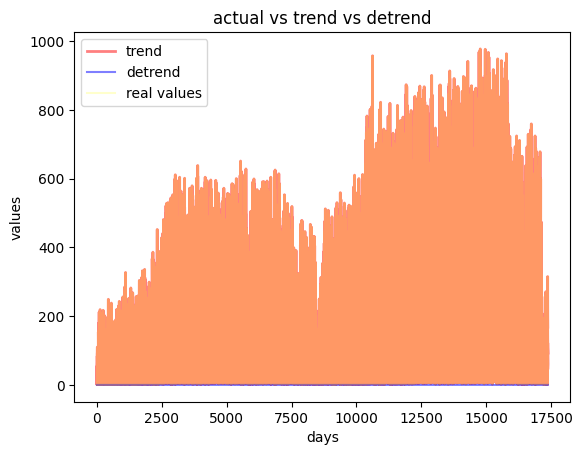

In [ ]:
plt.plot(bikes['dayCount'], bikes['trend'], color='red', alpha=0.5, label='trend' , linewidth='2')
plt.plot(bikes['dayCount'], bikes['Detrend'], color='blue', alpha= 0.5, label='detrend')
plt.plot(bikes['dayCount'], bikes['cnt'], color='yellow', label='real values',alpha=0.2)
plt.title('actual vs trend vs detrend')
plt.xlabel('days')
plt.ylabel('values')
plt.legend()
plt.show()

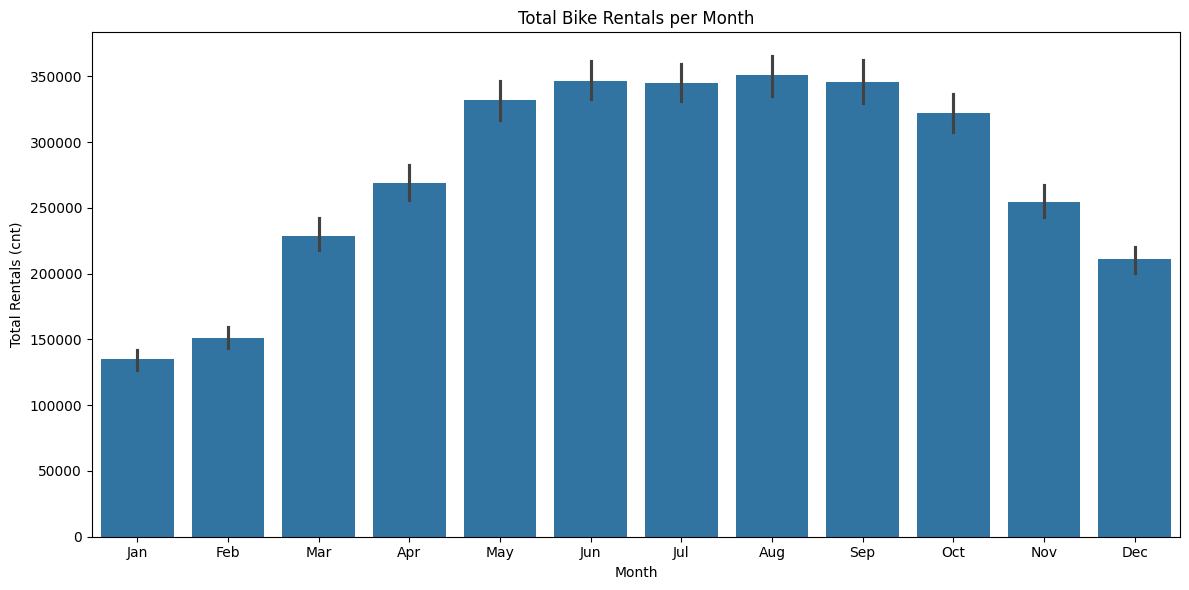

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=bikes, x='mnth', y='cnt', estimator='sum')

plt.title('Total Bike Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Total Rentals (cnt)')
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.tight_layout()
plt.show()


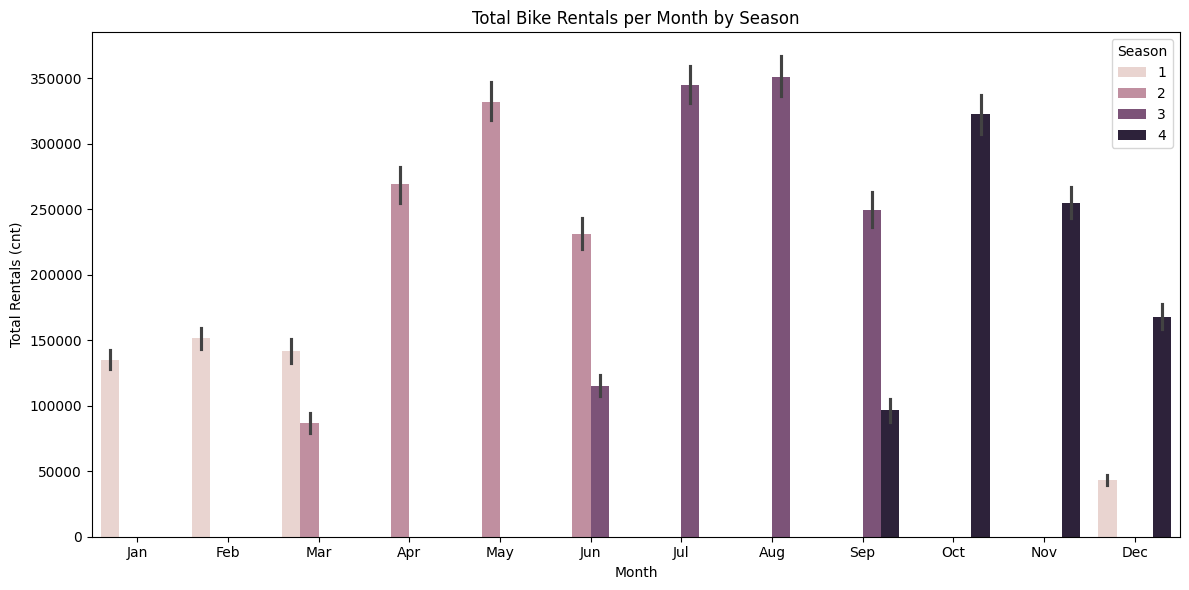

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=bikes, x='mnth', y='cnt', hue='season', estimator='sum')

plt.title('Total Bike Rentals per Month by Season')
plt.xlabel('Month')
plt.ylabel('Total Rentals (cnt)')
plt.legend(title='Season')
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.tight_layout()
plt.show()

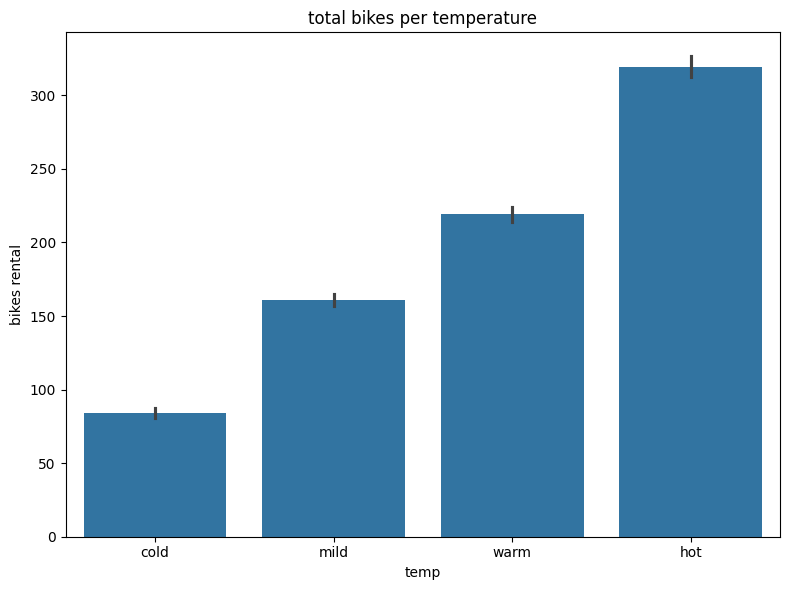

In [ ]:
bikes['temp_label'] = pd.cut(
    bikes['temp'],
    bins=[0,0.3,0.5,0.7,1],
    labels=['cold', 'mild', 'warm', 'hot']
)

plt.figure(figsize=(8,6))
sns.barplot(data=bikes, x='temp_label', y='cnt', estimator='mean')
plt.title('total bikes per temperature')
plt.ylabel('bikes rental')
plt.xlabel('temp')
plt.tight_layout()
plt.show()


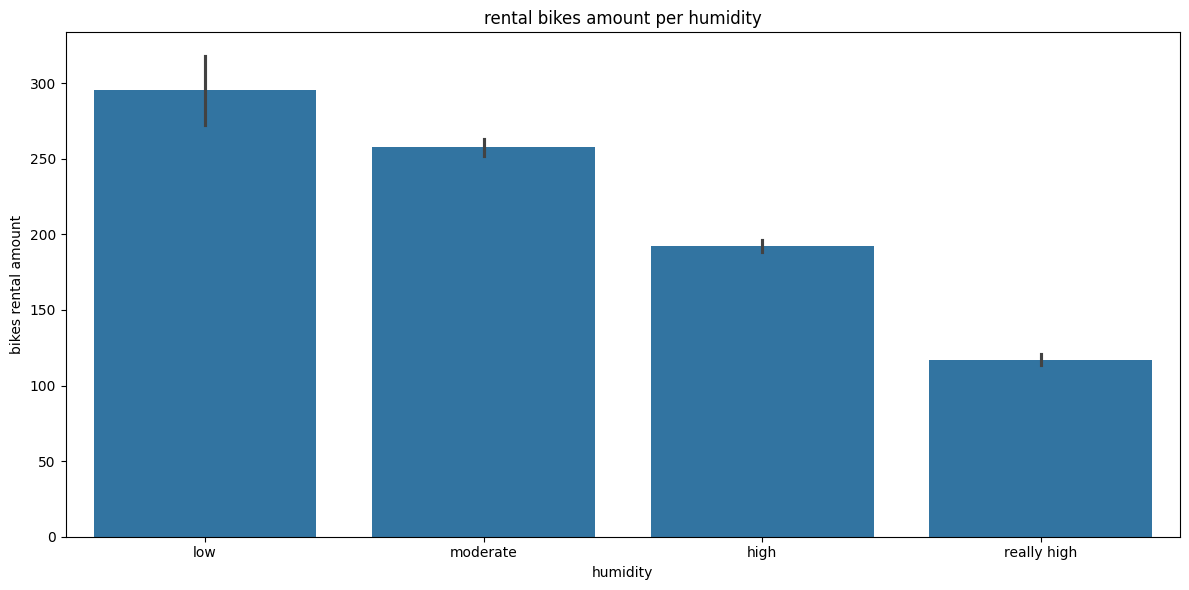

In [ ]:
bikes['hum_label']= pd.cut(
    bikes['hum'],
    bins=[0,0.25,0.5,0.75,1],
    labels=['low','moderate', 'high', 'really high']
)

plt.figure(figsize=(12,6))
sns.barplot(data=bikes, x='hum_label', y='cnt', estimator='mean')
plt.xlabel('humidity')
plt.ylabel('bikes rental amount')
plt.title('rental bikes amount per humidity')
plt.tight_layout()
plt.show()

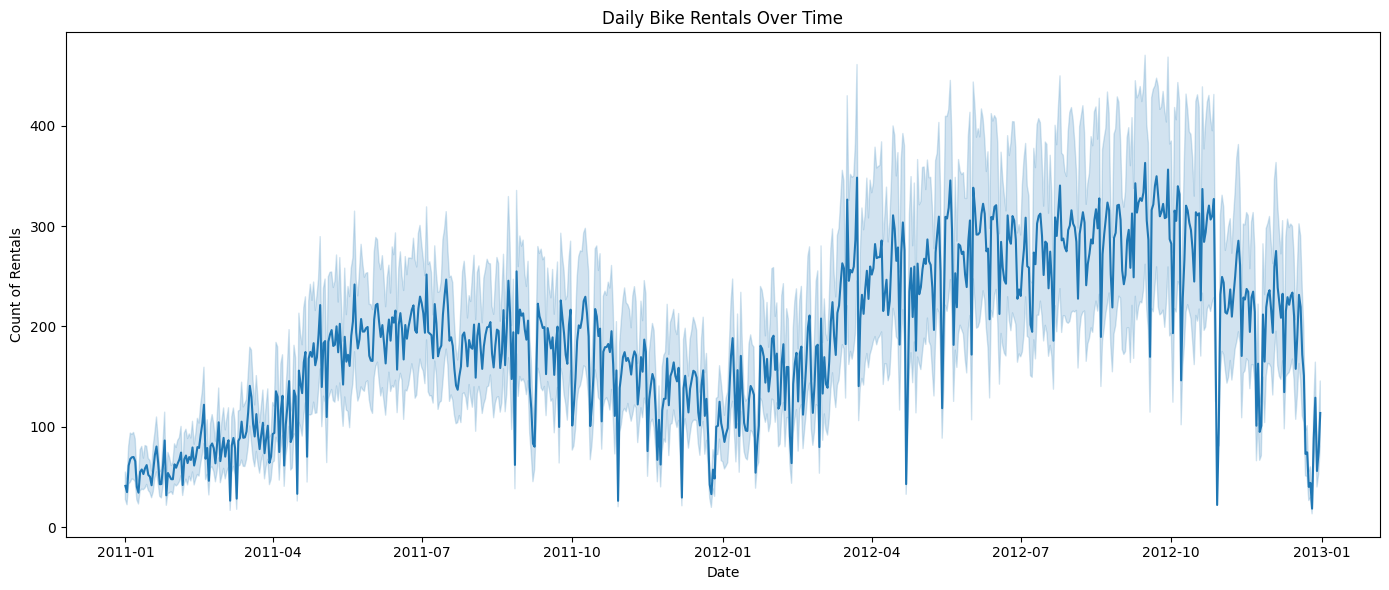

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=bikes, x='dteday', y='cnt')
plt.title("Daily Bike Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Count of Rentals")
plt.tight_layout()
plt.show()


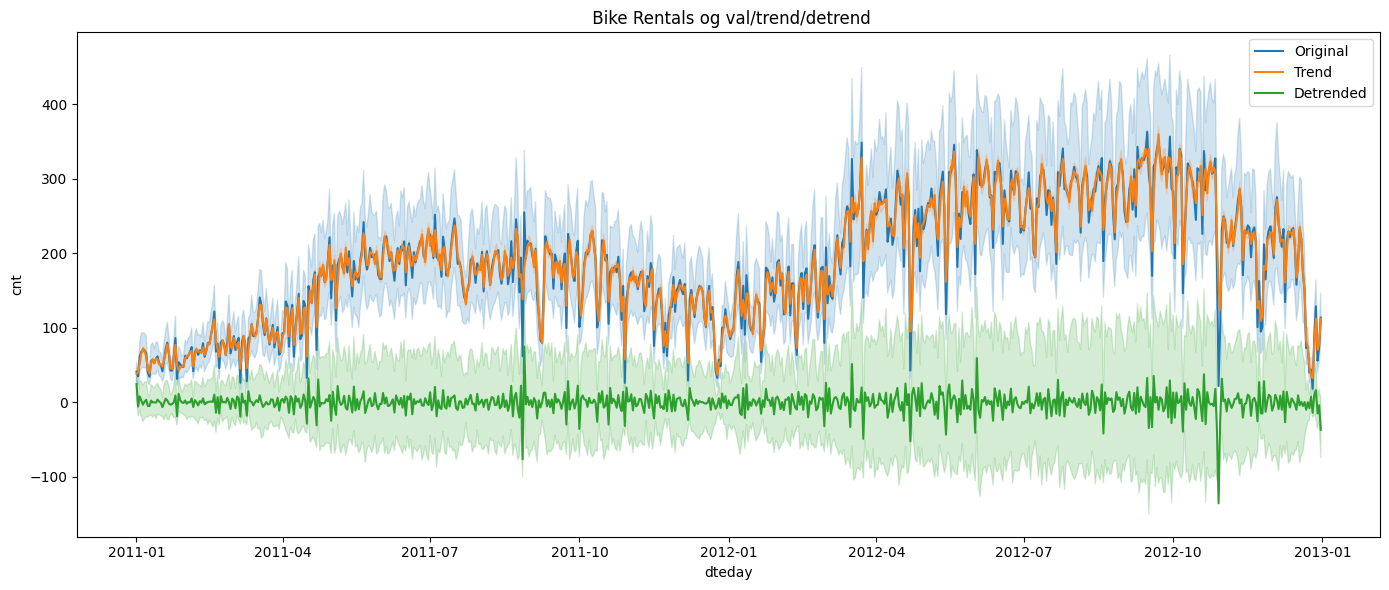

In [ ]:
bikes['trend'] = bikes['cnt'].rolling(window=30, center=True).mean()

plt.figure(figsize=(14, 6))
sns.lineplot(data=bikes, x='dteday', y='cnt', label='Original')
sns.lineplot(data=bikes, x='dteday', y='trend', label='Trend')
sns.lineplot(data=bikes, x='dteday', y='detrended', label='Detrended')
plt.title(" Bike Rentals og val/trend/detrend")
plt.legend()
plt.tight_layout()
plt.show()


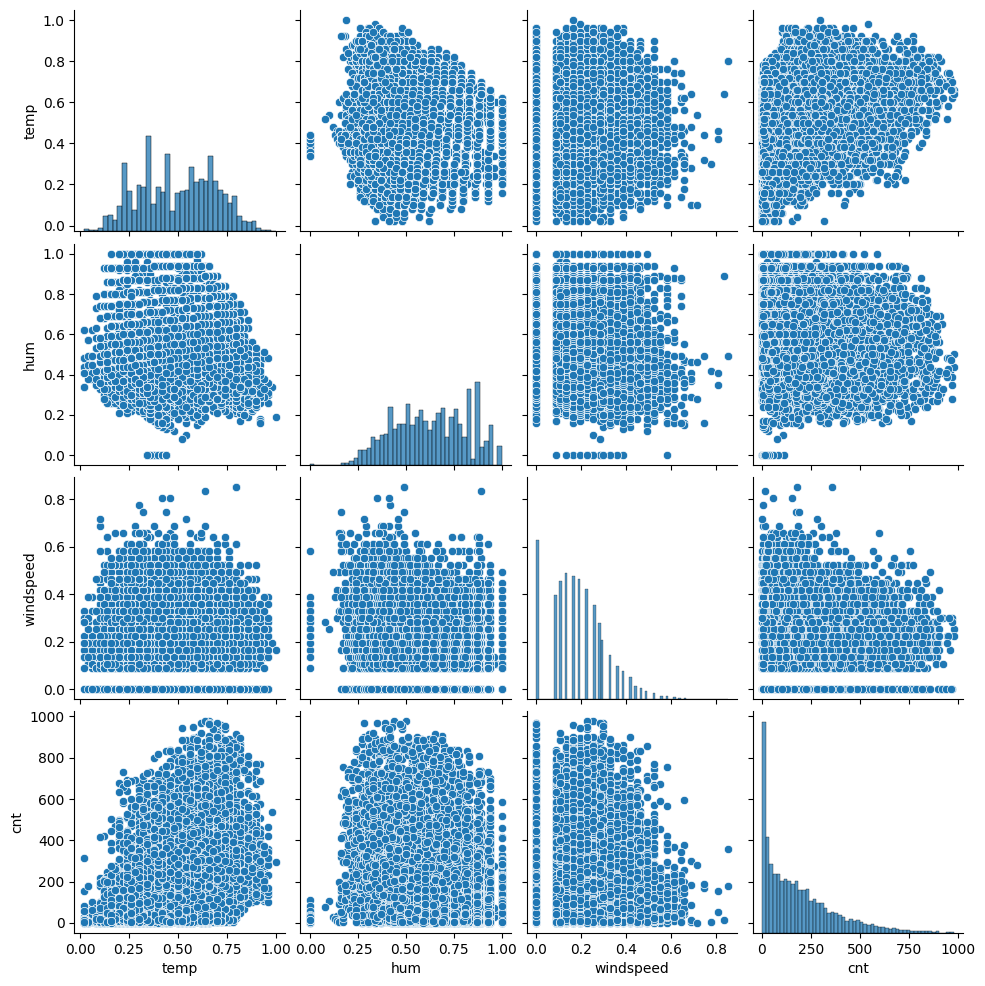

In [ ]:
sns.pairplot(bikes, vars=['temp', 'hum', 'windspeed', 'cnt'])
plt.show()


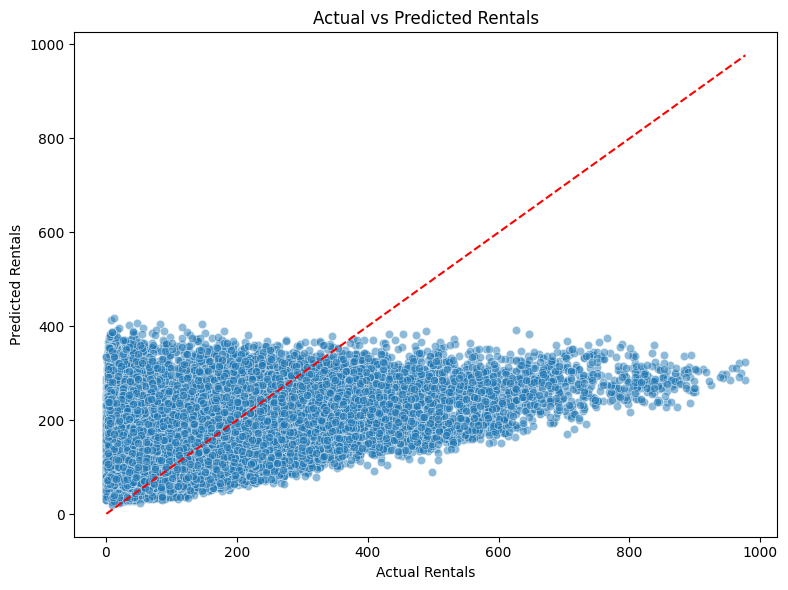

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=bikes['cnt'], y=bikes['trend'], alpha=0.5)
plt.plot([bikes['cnt'].min(), bikes['cnt'].max()], [bikes['cnt'].min(), bikes['cnt'].max()], color='red', linestyle='--')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.title('Actual vs Predicted Rentals')
plt.tight_layout()
plt.show()
